# Imports

In [ ]:
!pip install ucimlrepo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay, precision_recall_curve, average_precision_score, roc_curve, auc, make_scorer
from imblearn.over_sampling import BorderlineSMOTE, SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import Pipeline as ImblearnPipeline

# Fetching Data

In [ ]:


# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets



# Loading Data

In [ ]:
# load data
data = pd.concat([X, y], axis=1)
data

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

# Data Cleaning, Visualization

In [ ]:
data.isnull().sum()

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [ ]:
data.shape

(4424, 37)

In [ ]:
data.size

163688

In [ ]:
data['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [ ]:
#show description of the data


In [ ]:
data['Target'] = LabelEncoder().fit_transform(data['Target'])

In [ ]:
data['Target'].value_counts()

Target
2    2209
0    1421
1     794
Name: count, dtype: int64

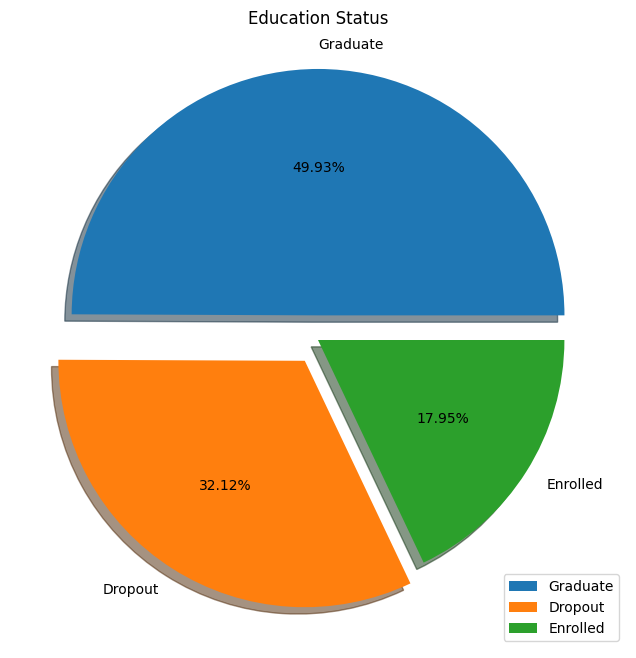

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Education Status")
plt.pie(data['Target'].value_counts(), labels = ['Graduate', 'Dropout', 'Enrolled'], explode = (0.1, 0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

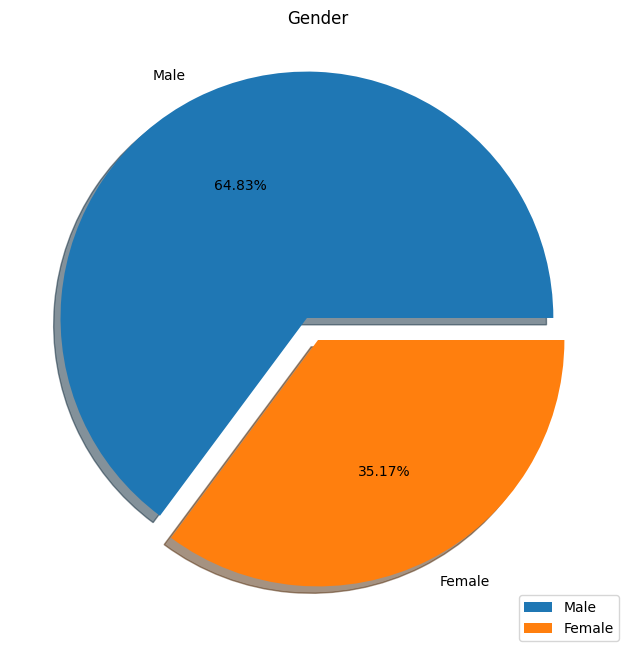

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Gender")
plt.pie(data['Gender'].value_counts(), labels = ['Male', 'Female'], explode = (0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

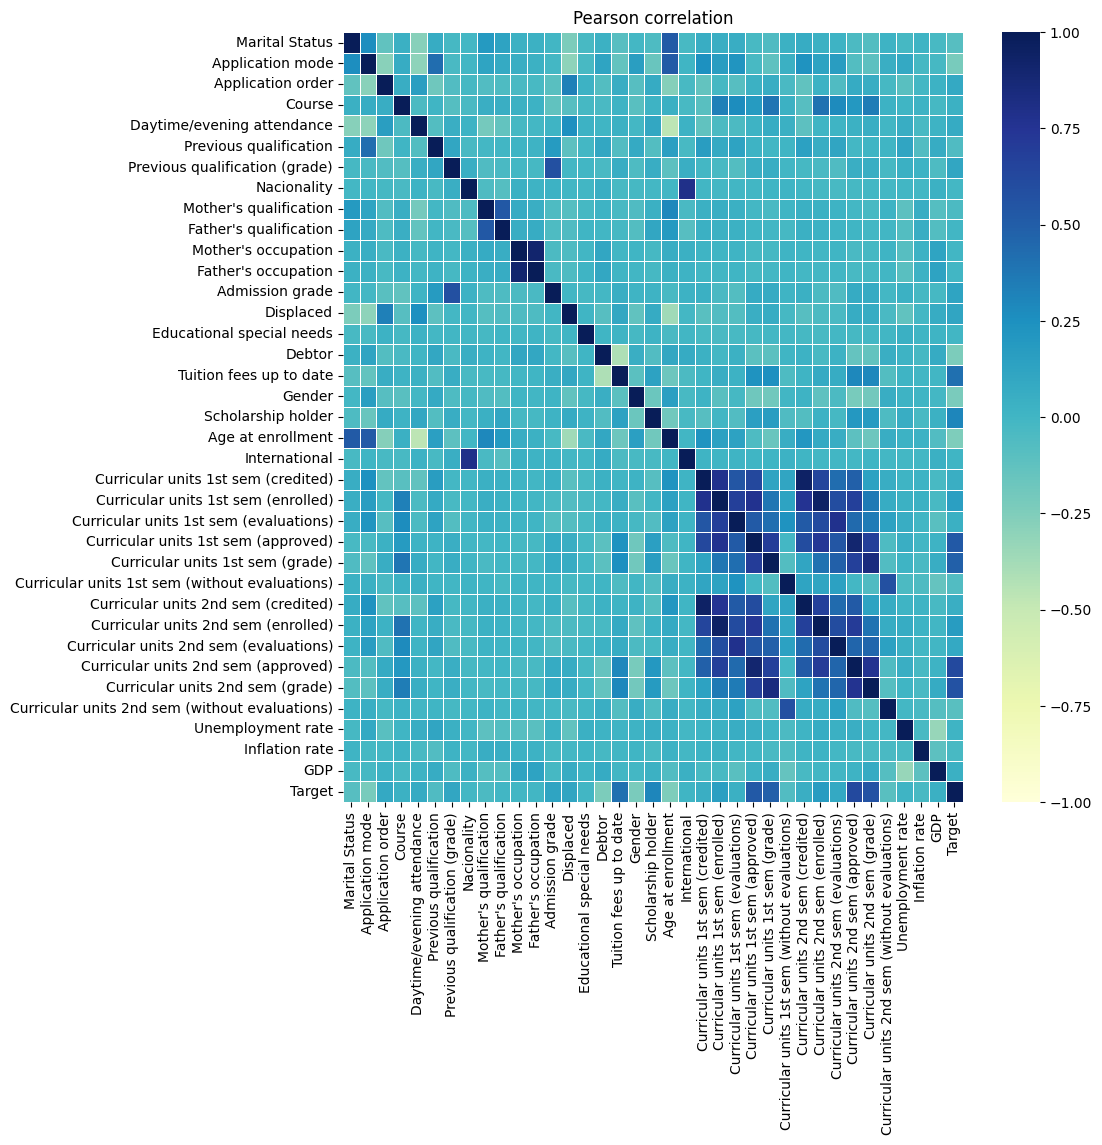

In [ ]:
#feature selection
corr_matrix = data.corr(method="pearson")
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=False, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Pearson correlation")
plt.show()

In [ ]:
["Tuition fees up to date","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)"]
corr_matrix["Target"]

Marital Status                                   -0.089804
Application mode                                 -0.221747
Application order                                 0.089791
Course                                            0.034219
Daytime/evening attendance                        0.075107
Previous qualification                           -0.056039
Previous qualification (grade)                    0.103764
Nacionality                                      -0.014801
Mother's qualification                           -0.043178
Father's qualification                           -0.001393
Mother's occupation                              -0.005629
Father's occupation                              -0.001899
Admission grade                                   0.120889
Displaced                                         0.113986
Educational special needs                        -0.007353
Debtor                                           -0.240999
Tuition fees up to date                           0.4098

## Specification
To focus on identifying dropouts, the enrolled target variable is being dropped entirely from the dataset and the target variable is now defined as: 1 if the student has dropped out, and 0 if the student has graduated.

In [ ]:
# Create a new 'Dropout' column with binary values
# 1 if 'Target' was 2 (Dropout), 0 otherwise (Graduate)
data['Dropout'] = 0  # Initialize with 0
data.loc[data['Target'] == 2, 'Dropout'] = 1

# Drop the 'Enrolled' class entries where 'Target' == 1
data = data[data['Target'] != 1]  # This drops the rows where 'Target' is 1

# Now, redefine X and y after these transformations
X = data.drop(columns=['Dropout', 'Target'])  # Assuming you no longer need the original 'Target'
y = data['Dropout']

# Reset index after dropping rows
data.reset_index(drop=True, inplace=True)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Perform the split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the splits
print("Shapes after split - x_train: {}, y_train: {}".format(x_train.shape, y_train.shape))


Shape of X: (3630, 36)
Shape of y: (3630,)
Shapes after split - x_train: (2904, 36), y_train: (2904,)


In [ ]:
data

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Dropout
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,2,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,2,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,6,9773,1,1,125.0,1,1,1,...,6,8,5,12.666667,0,15.5,2.8,-4.06,2,1
3626,1,1,2,9773,1,1,120.0,105,1,1,...,6,6,2,11.000000,0,11.1,0.6,2.02,0,0
3627,1,1,1,9500,1,1,154.0,1,37,37,...,8,9,1,13.500000,0,13.9,-0.3,0.79,0,0
3628,1,1,1,9147,1,1,180.0,1,37,37,...,5,6,5,12.000000,0,9.4,-0.8,-3.12,2,1


<Axes: xlabel='Dropout', ylabel='Count'>

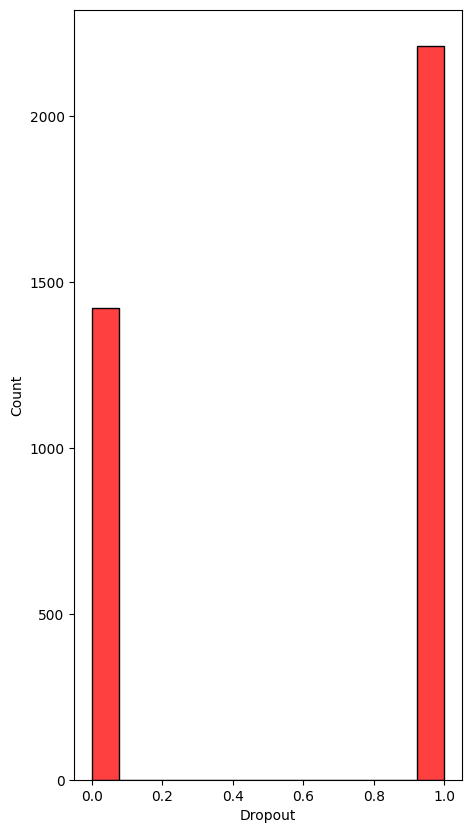

In [ ]:
plt.figure(figsize=(5, 10))
sns.histplot(data['Dropout'], color = "red")

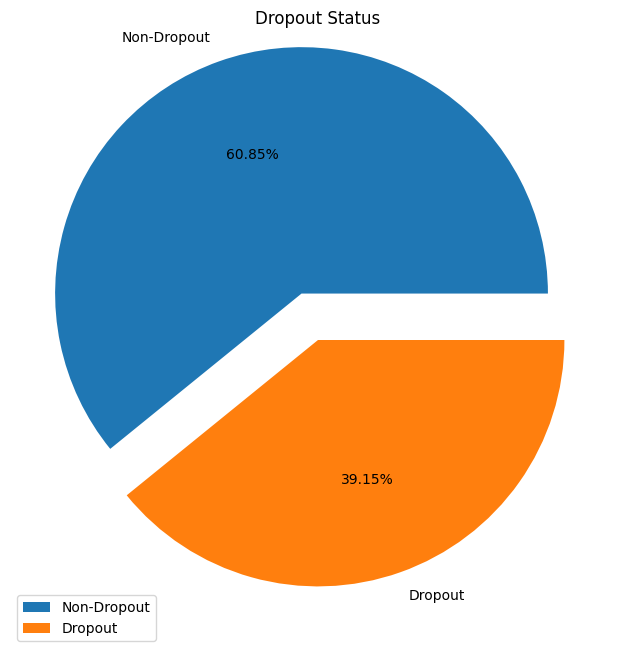

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Dropout Status")
plt.pie(data['Dropout'].value_counts(),  labels = ['Non-Dropout', 'Dropout'], explode = (0.2, 0.0), autopct='%1.2f%%')
plt.legend( loc = 'lower left')

In [ ]:
x = data.iloc[:, :36].values
#x = data[["Tuition fees up to date","Curricular units 1st sem (approved)","Curricular units 1st sem (grade)","Curricular units 2nd sem (approved)","Curricular units 2nd sem (grade)"]].values
print(x)
x = StandardScaler().fit_transform(x) # Normalizing the data (preprocessing)
x

[[ 1.   17.    5.   ... 10.8   1.4   1.74]
 [ 1.   15.    1.   ... 13.9  -0.3   0.79]
 [ 1.    1.    5.   ... 10.8   1.4   1.74]
 ...
 [ 1.    1.    1.   ... 13.9  -0.3   0.79]
 [ 1.    1.    1.   ...  9.4  -0.8  -3.12]
 [ 1.   10.    1.   ... 12.7   3.7  -1.7 ]]


array([[-0.30068558, -0.08191671,  2.4368225 , ..., -0.31131218,
         0.12161459,  0.77411864],
       [-0.30068558, -0.19714928, -0.56247077, ...,  0.85091858,
        -1.10607007,  0.35370412],
       [-0.30068558, -1.00377727,  2.4368225 , ..., -0.31131218,
         0.12161459,  0.77411864],
       ...,
       [-0.30068558, -1.00377727, -0.56247077, ...,  0.85091858,
        -1.10607007,  0.35370412],
       [-0.30068558, -1.00377727, -0.56247077, ..., -0.83619059,
        -1.46715379, -1.37663355],
       [-0.30068558, -0.4852307 , -0.56247077, ...,  0.4010228 ,
         1.78259971, -0.74822447]])

# Split the Data

# Suggestions for Improvement


### Handling Imbalanced Data:
If your data is imbalanced (more instances of one class over another), consider techniques like SMOTE, as you have done previously, or adjusting the class_weight parameter in the classifier to handle imbalance.



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming 'X' and 'y' are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Now you can continue to use 'X_train_smote' and 'y_train_smote' for training your model


### Hyperparameter Tuning:
Consider using techniques like Grid Search or Random Search to find optimal parameters for the Random Forest model.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the classifier and parameters
classifier = RandomForestClassifier()
scoring = {
    'f1': make_scorer(f1_score, average='macro'),  # Using macro-average for multi-class classification
    'recall': make_scorer(recall_score, average='macro'),
    'precision': make_scorer(precision_score, average='macro')
}
parameters = {
    'n_estimators': [200, 300, 400, 500],  # Number of trees in the forest
    'max_depth': [8, 9, 10, 11, 12],   # Maximum depth of the tree
    'min_samples_split': [2, 3, 4, 5],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3, 4],         # Minimum number of samples required to be at a leaf node


}

#Create a GridSearchCV object
grid_search = GridSearchCV(classifier, parameters, cv=5, scoring=scoring, verbose=2, n_jobs=-1,return_train_score=True,refit='f1')

# Fit GridSearchCV
grid_search.fit(X, y)  # Make sure X and y are your features and target variable respectively

# Best parameters and best score





Fitting 5 folds for each of 320 candidates, totalling 1600 fits


KeyboardInterrupt: 

In [ ]:
print("Best parameters found: ", grid_search.best_estimator_.get_params())
("Best cross-validated score: ", grid_search.best_score_)

### Random Forest Cross-Validation:





In [ ]:

# Set up the classifier with the specified parameters
classifier = RandomForestClassifier(
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=300,
    random_state=42,
    max_features='sqrt'
)

# Perform cross-validation
scores = cross_val_score(classifier, X, y, cv=5, scoring='accuracy')

# Output the results
print("Cross-validated scores:", scores)
print("Average score:", scores.mean())
print("Standard deviation of scores:", scores.std())

Cross-validated scores: [0.9077135  0.9077135  0.90909091 0.90909091 0.9077135 ]
Average score: 0.9082644628099172
Standard deviation of scores: 0.0006747905627501663


### Model Interpretation:
Tools like feature_importances_ in Random Forest can help you understand which features are most influential in predicting dropouts.



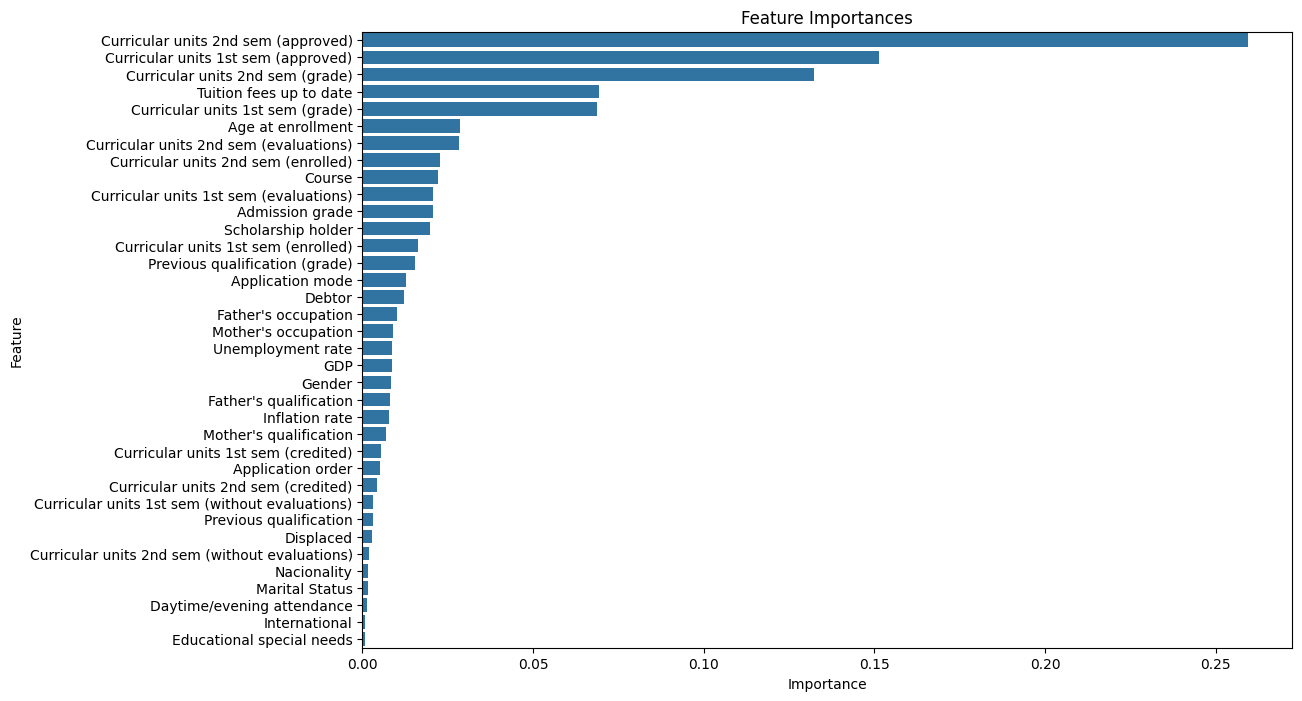

In [ ]:
classifier.fit(X_train, y_train)

# Get feature importances
importances = classifier.feature_importances_

# Get the feature names (adjust this if your X is a DataFrame)
feature_names = X.columns if isinstance(X, pd.DataFrame) else [f"Feature {i}" for i in range(X.shape[1])]

# Create a DataFrame to hold feature names and their importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Visualization:
Use plots such as the Precision-Recall curve or ROC curve to visually assess model performance. This can also help in comparing different models.

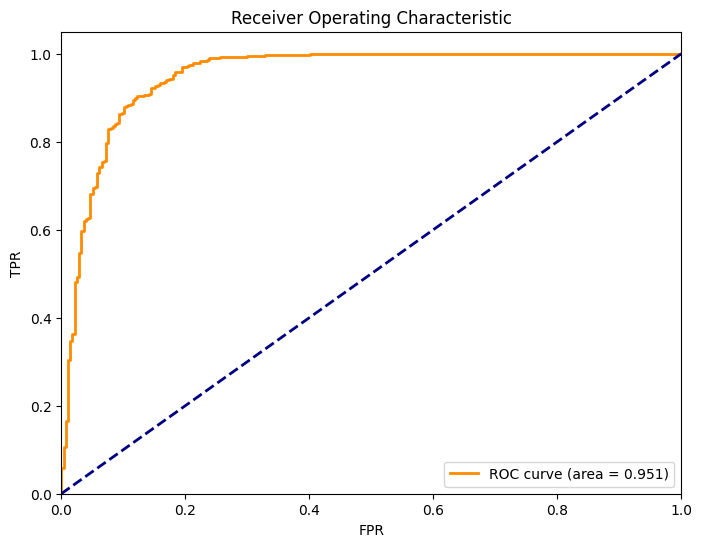

In [ ]:
y_probs = classifier.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

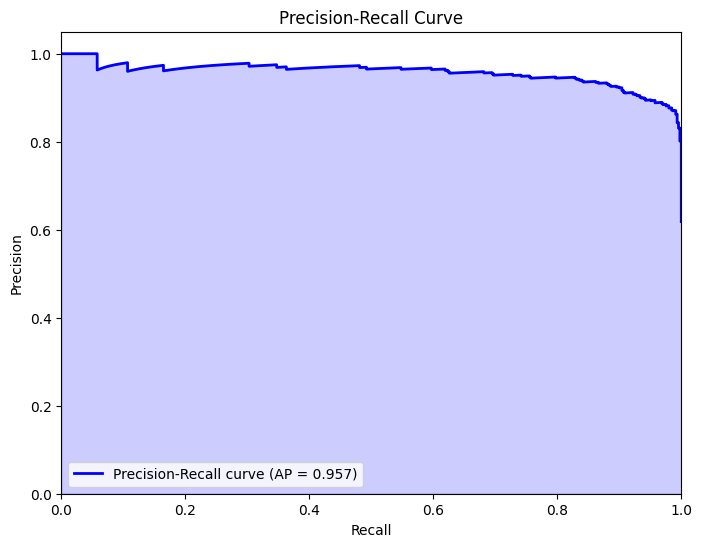

In [ ]:
y_probs = classifier.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Calculate Average Precision (AP)
ap = average_precision_score(y_test, y_probs)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {ap:.3f})')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

<Figure size 800x600 with 0 Axes>

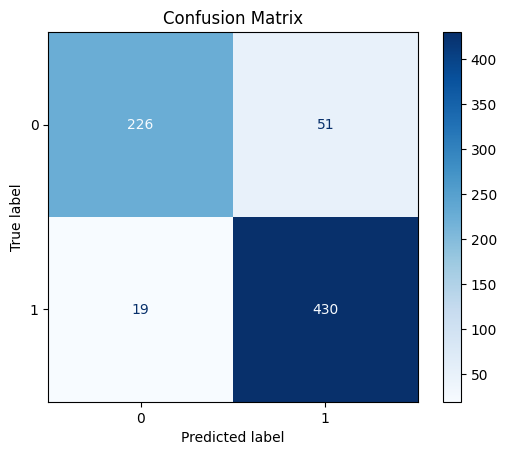

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already trained your classifier and have X_test ready
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [ ]:
model_rf = RandomForestClassifier(max_depth=10, min_samples_leaf=1,min_samples_split=5, n_estimators=300, random_state=42, max_features='sqrt')

model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(x_test)
print("Random Forest Classifier")
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Precision: ", precision_score(y_test, y_pred_rf))
print("Recall: ", recall_score(y_test, y_pred_rf))
print("F1 Score: ", f1_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


# No Parameters
#Accuracy:  0.9034812672176309
#Precision:  0.8923395445134575
#Recall:  0.9599109131403119
#F1 Score:  0.924892703862661

#SMOTE
#Accuracy:  0.8980716253443526
#Precision:  0.8947368421052632
#Recall:  0.9465478841870824
#F1 Score:  0.9199134199134198

#class_weight='balanced'
#Accuracy:  0.9008264462809917
#Precision:  0.8902691511387164
#Recall:  0.9566837416481069
#F1 Score:  0.9227467811158798

#Best Model Params
#Accuracy:  0.9035812672176309
#Precision:  0.89397089397089478
#Recall:  0.95768374164812465
#F1 Score:  0.92473118279569894

Random Forest Classifier
Accuracy:  0.9035812672176309
Precision:  0.893970893970894
Recall:  0.9576837416481069
F1 Score:  0.9247311827956989
              precision    recall  f1-score   support

           0       0.92      0.82      0.87       277
           1       0.89      0.96      0.92       449

    accuracy                           0.90       726
   macro avg       0.91      0.89      0.90       726
weighted avg       0.90      0.90      0.90       726



# Logistic Regression

In [ ]:
model_lr = LogisticRegression( C=1,
                               class_weight=None,
                               intercept_scaling=2,
                               max_iter=50,
                               penalty='l2',
                               solver='liblinear')
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(x_test)
print("Logistic Regression Classifier")
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print("Precision: ", precision_score(y_test, y_pred_lr))
print("Recall: ", recall_score(y_test, y_pred_lr))
print("F1 Score: ", f1_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# No Parameters
#Accuracy:  0.8650137741046832
#Precision:  0.8531187122736419
#Recall:  0.9443207126948775
#F1 Score:  0.8964059196617337

#SMOTE
#Accuracy:  0.8636363636363636
#Precision:  0.8854625550660793
#Recall:  0.8953229398663697
#F1 Score:  0.8903654485049833

#class_weight='balanced'
#Accuracy:  0.8622589531680441
#Precision:  0.8768898488120951
#Recall:  0.9042316258351893
#F1 Score:  0.8903508771929826

#Best Model Params
#Accuracy:  0.9146005509641874
#Precision:  0.910828025477707
#Recall:  0.955456570155902
#F1 Score:  0.932608695652174



Logistic Regression Classifier
Accuracy:  0.9173553719008265
Precision:  0.9129511677282378
Recall:  0.9576837416481069
F1 Score:  0.9347826086956521
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       277
           1       0.91      0.96      0.93       449

    accuracy                           0.92       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.92      0.92      0.92       726



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the model
logreg = LogisticRegression(solver='liblinear')  # Using 'liblinear' because it's better for small datasets and binary classification.

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],    # Regularization strength
    'penalty': ['l1', 'l2'],                # Norms used in the penalization
    'solver': ['liblinear'],        # Solvers capable of handling L1 penalty
    'class_weight': [None],     # Option to handle imbalanced classes
    'max_iter': [50,100,150],            # Maximum number of iterations taken for the solvers to converge
    'intercept_scaling': [1, 2, 3]             # Useful for regularization
}


In [ ]:
# Set up the grid search with cross-validation
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring="recall",  # Can be changed based on what performance metric you care about
    cv=5,  # Number of cross-validation folds
    verbose=1,  # For logging the progress
    n_jobs=-1  # Use all available CPUs
)
grid_search.fit(X_train, y_train)


In [ ]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


In [ ]:

# Set up the classifier with the specified parameters
LRclassifier=LogisticRegression(
    C=1,
    class_weight=None,
    intercept_scaling=2,
    max_iter=50,
    penalty='l2',
    solver='liblinear')

# Perform cross-validation
scores = cross_val_score(LRclassifier, X, y, cv=5, scoring='accuracy')

# Output the results
print("Cross-validated scores:", scores)
print("Average score:", scores.mean())
print("Standard deviation of scores:", scores.std())

Cross-validated scores: [0.91735537 0.90909091 0.91460055 0.9077135  0.91322314]
Average score: 0.912396694214876
Standard deviation of scores: 0.003549338492210797


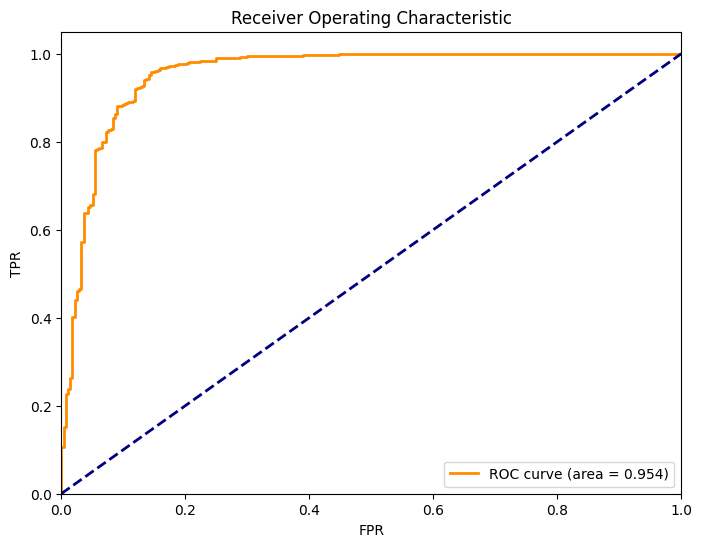

In [ ]:
LRclassifier.fit(X_train, y_train)
y_probs = LRclassifier.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

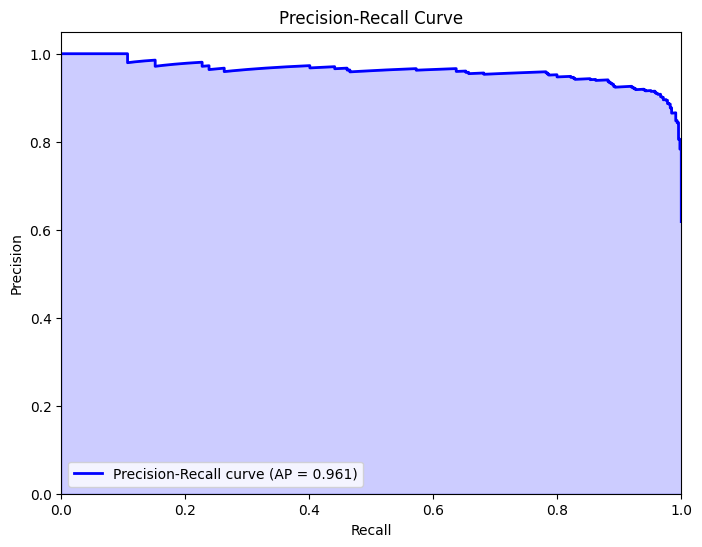

In [ ]:
y_probs = LRclassifier.predict_proba(X_test)[:, 1]  # get probabilities for the positive class

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Calculate Average Precision (AP)
ap = average_precision_score(y_test, y_probs)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall curve (AP = {ap:.3f})')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

<Figure size 800x600 with 0 Axes>

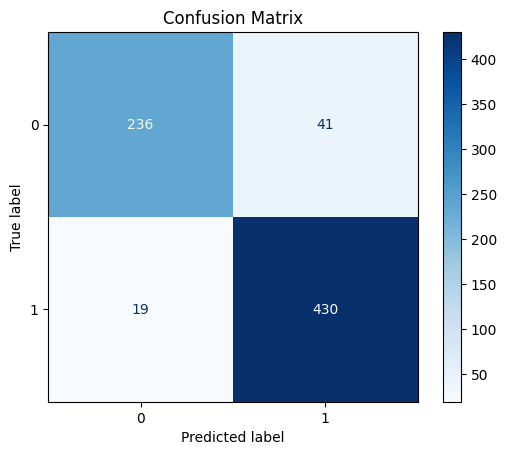

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have already trained your classifier and have X_test ready
y_pred = LRclassifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LRclassifier.classes_)

plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()
